In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Netflix TV Shows and Movies.csv")
data.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [4]:
data.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [5]:
data.columns

Index(['index', 'id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [6]:
data.isnull().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [7]:
#data cleaning

In [8]:
data.drop(['id','description','imdb_id'],axis=1, inplace= True)

In [9]:
data['imdb_votes'].fillna(method="ffill",inplace=True)

value = data.dropna()
value.head(10)

,index,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes
0,0,Taxi Driver,MOVIE,1976,R,113,8.3,795222.0
1,1,Monty Python and the Holy Grail,MOVIE,1975,PG,91,8.2,530877.0
2,2,Life of Brian,MOVIE,1979,R,94,8.0,392419.0
3,3,The Exorcist,MOVIE,1973,R,133,8.1,391942.0
4,4,Monty Python's Flying Circus,SHOW,1969,TV-14,30,8.8,72895.0
5,5,Dirty Harry,MOVIE,1971,R,102,7.7,153463.0
6,6,My Fair Lady,MOVIE,1964,G,170,7.8,94121.0
7,7,The Blue Lagoon,MOVIE,1980,R,104,5.8,69053.0
8,8,Bonnie and Clyde,MOVIE,1967,R,110,7.7,111189.0
9,9,The Professionals,MOVIE,1966,PG-13,117,7.3,16168.0


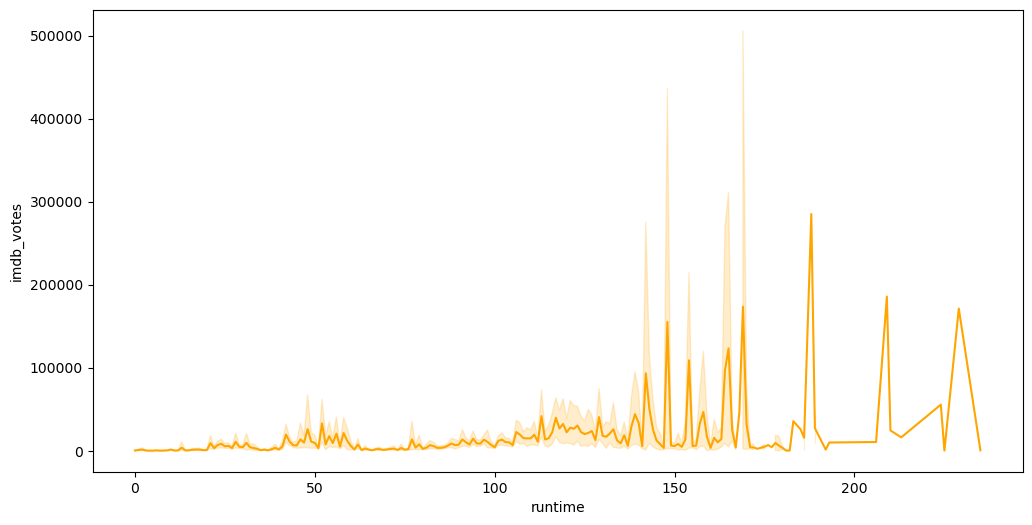

In [10]:
plt.figure(figsize=(12,6))
sns.lineplot(x=data["runtime"],y=data['imdb_votes']/2,color='orange')
plt.xlabel("runtime")
plt.ylabel("imdb_votes")
plt.show()

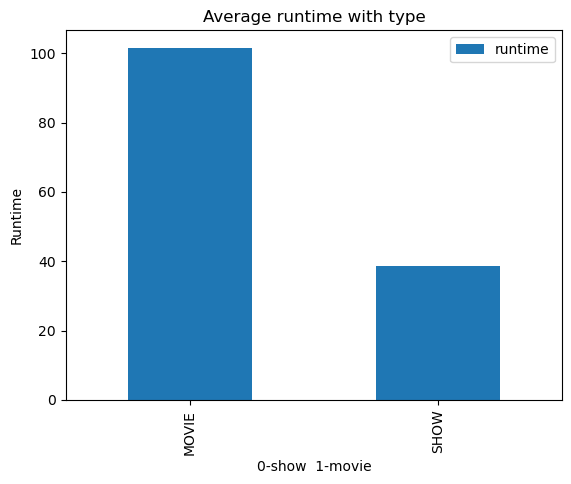

In [11]:
value = data.groupby(['type'])['runtime'].mean().plot(kind="bar");

plt.title("Average runtime with type")
plt.legend()
plt.xlabel("0-show  1-movie")
plt.ylabel("Runtime")
plt.show()

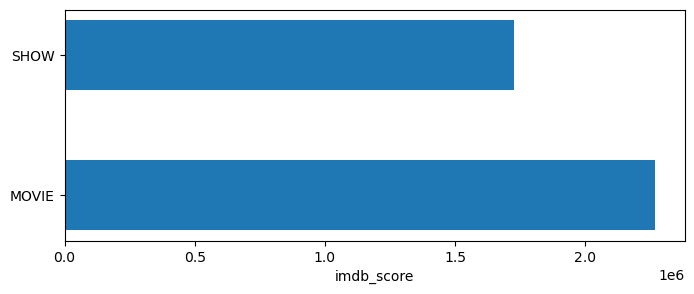

In [13]:
plt.figure(figsize=(8,3))

plt.barh(data["type"],data["imdb_votes"],height=0.5)
plt.xlabel("imdb_score")
plt.show()

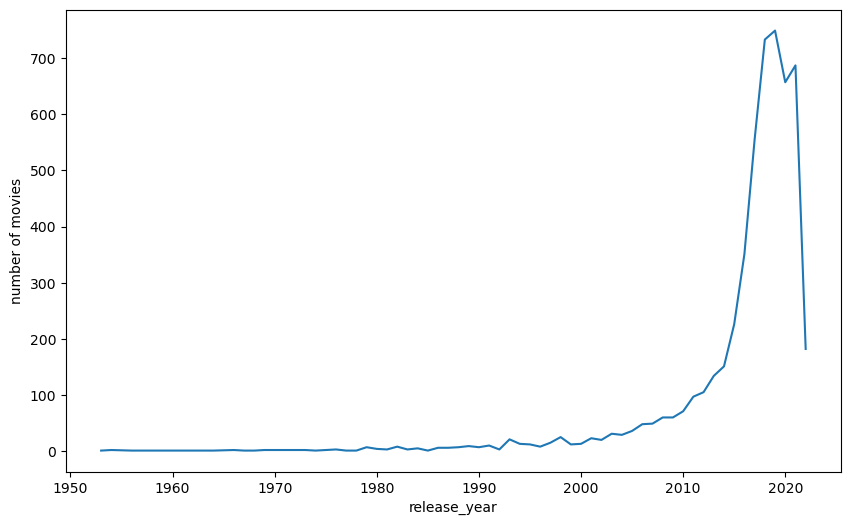

In [17]:
plt.figure(figsize=(10,6))
data.groupby(['release_year'])['title'].count().plot()
plt.ylabel('number of movies')
plt.show()

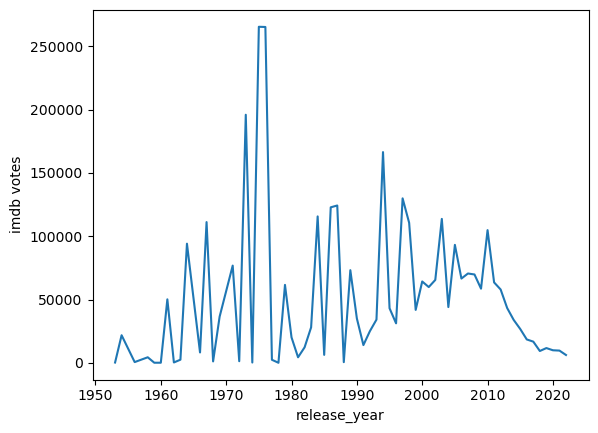

In [18]:
data.groupby(['release_year'])['imdb_votes'].mean().plot()
plt.ylabel("imdb votes")
plt.show()

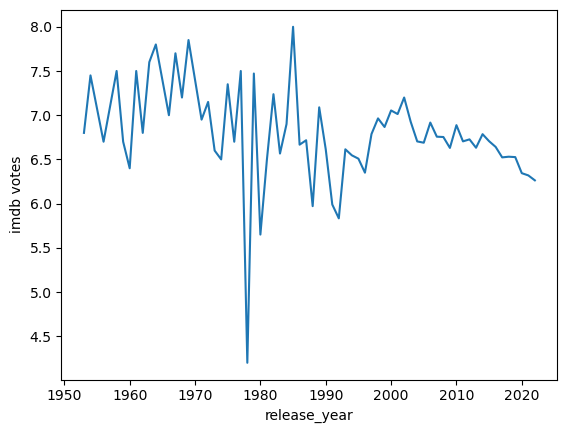

In [20]:
data.groupby(['release_year'])['imdb_score'].mean().plot()
plt.ylabel("imdb votes")
plt.show()

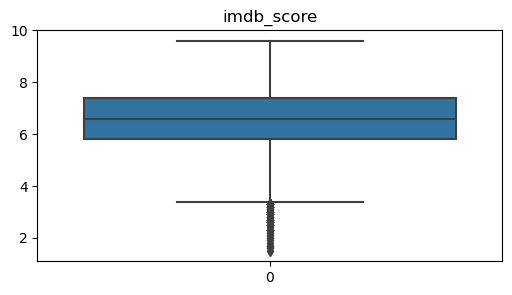

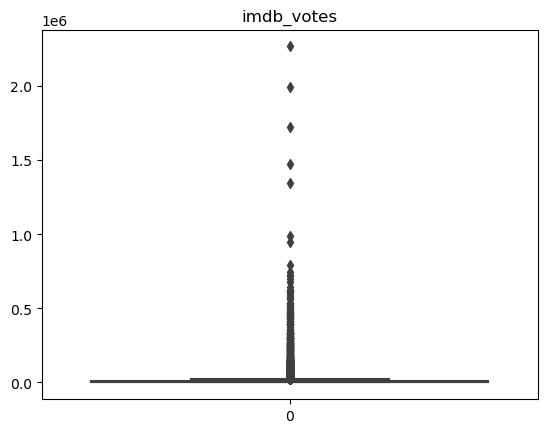

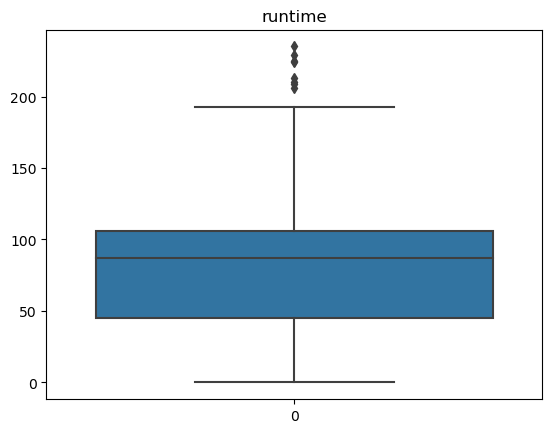

In [23]:
plt.figure(figsize=(6,3))
for i in ["imdb_score","imdb_votes","runtime"]:
        sns.boxplot(data[i])
        plt.title(i)
        
        plt.show()
    

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in data.select_dtypes(include ='object').columns:
    data[column]=label_encoder.fit_transform(data[column])
    
print(data)    

      index  title  type  release_year  age_certification  runtime  \
0         0   3982     0          1976                  4      113   
1         1   2804     0          1975                  2       91   
2         2   2431     0          1979                  4       94   
3         3   4212     0          1973                  4      133   
4         4   2806     1          1969                  5       30   
...     ...    ...   ...           ...                ...      ...   
5278   5278   2787     0          2021                 11      108   
5279   5279   1470     0          2021                 11      100   
5280   5280    922     0          2021                 11       88   
5281   5281   3669     0          2021                 11      116   
5282   5282   2726     1          2021                 11        0   

      imdb_score  imdb_votes  
0            8.3    795222.0  
1            8.2    530877.0  
2            8.0    392419.0  
3            8.1    391942.0  
4   

<Axes: >

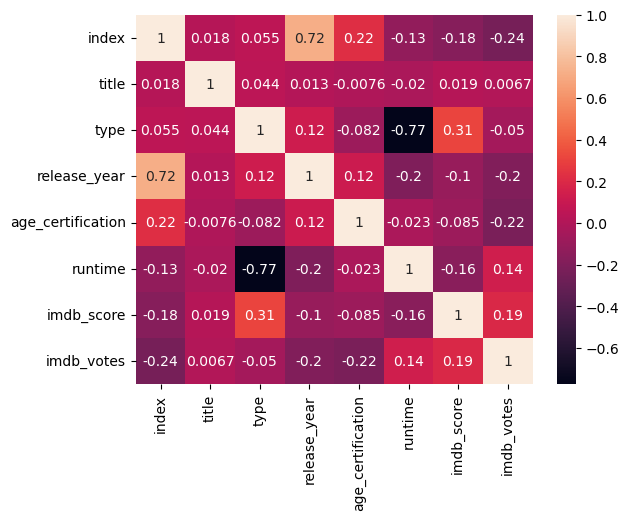

In [30]:
corr_val=data.corr()
sns.heatmap(corr_val, annot=True)